In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
!pip install pandas scikit-learn matplotlib seaborn

In [66]:
dataset1=pd.read_csv("ev_vehicle_dataset.csv")

In [68]:
dataset1.head(50)

,Vehicle Type,Brand,Model,Year,Range (km),Top Speed (km/h)
0,Bike,Ultraviolette,F77,2019,97,158
1,Car,Mahindra,eVerito,2020,164,111
2,Bike,PURE EV,eTryst 350,2020,177,95
3,Scooter,Ola Electric,S1 Pro,2022,158,150
4,Scooter,Ola Electric,S1 Pro,2019,79,170
5,Car,Tata Motors,Nexon EV,2023,218,157
6,Bike,Tork Motors,Kratos,2019,88,98
7,Scooter,Hero Electric,Optima,2023,252,174
8,Scooter,TVS,iQube,2022,119,161
9,Car,BYD,Atto 3,2020,171,127


In [7]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Vehicle Type      5000 non-null   object
 1   Brand             5000 non-null   object
 2   Model             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Range (km)        5000 non-null   int64 
 5   Top Speed (km/h)  5000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 234.5+ KB


In [18]:
dataset1.describe()

,Year,Range (km),Top Speed (km/h)
count,5000.000000,5000.00000,5000.000000
mean,2020.983000,288.67200,119.755200
std,1.416585,122.24732,34.734878
min,2019.000000,75.00000,60.000000
25%,2020.000000,183.00000,90.000000
50%,2021.000000,288.00000,120.000000
75%,2022.000000,395.00000,150.000000
max,2023.000000,500.00000,180.000000


In [47]:
#Taking out the most selling vehicle body type
print(dataset1.columns)
highest_body_type=dataset1['Vehicle Type'].value_counts().idxmax()
print(highest_body_type)

Index(['Vehicle Type', 'Brand', 'Model', 'Year', 'Range (km)',
       'Top Speed (km/h)'],
      dtype='object')
Scooter


Generated a plot for body type distribution (commented out plt.show()).



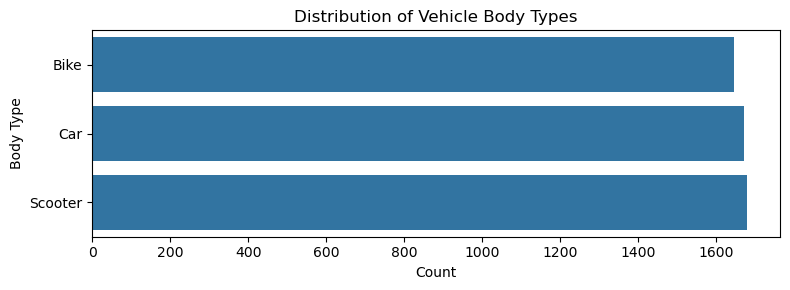

In [79]:
 #Calculating the portion of each body type from the total dataset entries
plt.figure(figsize=(8, 3))
sns.countplot(data=dataset1, y='Vehicle Type')
plt.title('Distribution of Vehicle Body Types')
plt.xlabel('Count')
plt.ylabel('Body Type')
plt.tight_layout()
plt.show() 
print("Generated a plot for body type distribution") 

In [55]:
#CONVERTING CATEGORICAL DATA TO NUMERIC DATA {VEHICLE TYPE}
# AS SCOOTER = '0'
#       BIKE = '1'
#       CAR = '3'
dataset1['Vehicle Type'].replace(to_replace=["Scooter","Bike","Car"],value=[0, 1,2],inplace=True)

C:\Users\Legion\AppData\Local\Temp\ipykernel_18600\973323228.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset1['Vehicle Type'].replace(to_replace=["Scooter","Bike","Car"],value=[0, 1,2],inplace=True)
C:\Users\Legion\AppData\Local\Temp\ipykernel_18600\973323228.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

In [57]:
dataset1.head(10)

,Vehicle Type,Brand,Model,Year,Range (km),Top Speed (km/h)
0,1,Ultraviolette,F77,2019,97,158
1,2,Mahindra,eVerito,2020,164,111
2,1,PURE EV,eTryst 350,2020,177,95
3,0,Ola Electric,S1 Pro,2022,158,150
4,0,Ola Electric,S1 Pro,2019,79,170
5,2,Tata Motors,Nexon EV,2023,218,157
6,1,Tork Motors,Kratos,2019,88,98
7,0,Hero Electric,Optima,2023,252,174
8,0,TVS,iQube,2022,119,161
9,2,BYD,Atto 3,2020,171,127


In [125]:
features_encoded = ['Year', 'Range (km)', 'Vehicle Type Encoded']
#Vehicle Type', 'Brand', 'Model', 'Year', 'Range (km)',
    #   'Top Speed (km/h)

In [127]:
features_encoded

['Year', 'Range (km)', 'Vehicle Type Encoded']

In [33]:
dataset1.head(10)

,Vehicle Type,Brand,Model,Year,Range (km),Top Speed (km/h)
0,1,Ultraviolette,F77,2019,97,158
1,2,Mahindra,eVerito,2020,164,111
2,1,PURE EV,eTryst 350,2020,177,95
3,0,Ola Electric,S1 Pro,2022,158,150
4,0,Ola Electric,S1 Pro,2019,79,170
5,2,Tata Motors,Nexon EV,2023,218,157
6,1,Tork Motors,Kratos,2019,88,98
7,0,Hero Electric,Optima,2023,252,174
8,0,TVS,iQube,2022,119,161
9,2,BYD,Atto 3,2020,171,127


In [73]:
X = ['Year' ,'Range (km)' ,'Top Speed (km/h)']  

['Year', 'Range (km)', 'Top Speed (km/h)']

In [36]:
X

,Year,Range (km),Top Speed (km/h)
0,2019,97,158
1,2020,164,111
2,2020,177,95
3,2022,158,150
4,2019,79,170
...,...,...,...
4995,2021,359,127
4996,2021,409,137
4997,2019,487,84
4998,2021,369,136


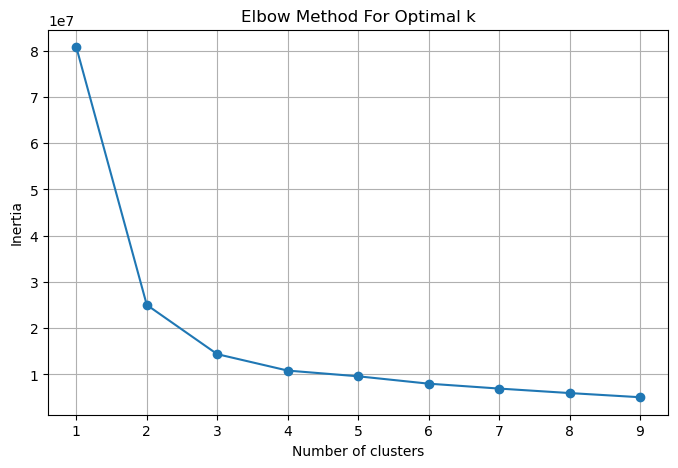

In [38]:
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [42]:
print("\nMost common vehicle type in each cluster:")
print(dataset1_clean.groupby('Cluster')['Vehicle Type'].agg(lambda x: x.value_counts().idxmax()))


Most common vehicle type in each cluster:
Cluster
0    Scooter
1        Car
2    Scooter
Name: Vehicle Type, dtype: object


Vehicle Type
0    33.62
2    33.44
1    32.94
Name: proportion, dtype: float64


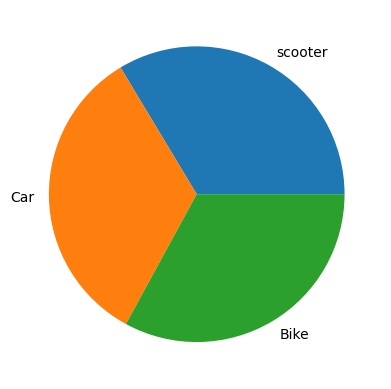

In [71]:
percent_distribution = dataset1['Vehicle Type'].value_counts(normalize=True) * 100
print(percent_distribution)
plt.pie(percent_distribution, labels=['scooter', 'Car', 'Bike'])
plt.show()

In [75]:
average_range_vehicle_type = dataset1.groupby('Vehicle Type')['Range (km)'].mean().round(2)
print(average_range_vehicle_type)

Vehicle Type
0    291.48
1    286.93
2    287.57
Name: Range (km), dtype: float64


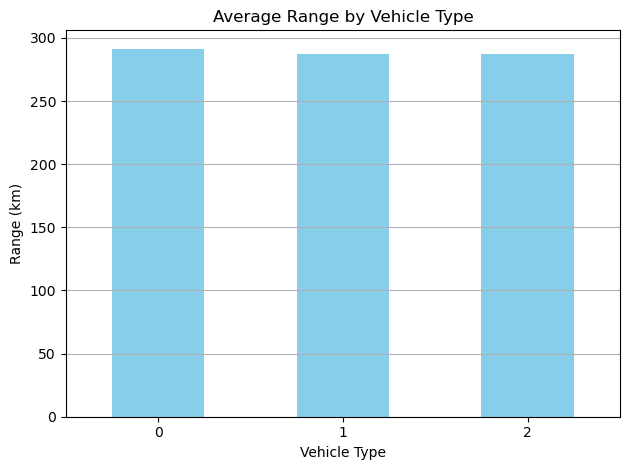

In [79]:
#import matplotlib.pyplot as plt

average_range_vehicle_type.plot(kind='bar', color='skyblue')
plt.title('Average Range by Vehicle Type')
plt.ylabel('Range (km)')
plt.xlabel('Vehicle Type')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [81]:
average_speed_by_type = dataset1.groupby('Vehicle Type')['Top Speed (km/h)'].mean().round(2)
print(average_speed_by_type)

Vehicle Type
0    120.18
1    119.61
2    119.47
Name: Top Speed (km/h), dtype: float64


In [9]:
production_ts = dataset1.groupby(['Year', 'Vehicle Type']).size().unstack(fill_value=0)

# Result: a DataFrame with Year as index, and columns for each vehicle type
print(production_ts)

Vehicle Type  Bike  Car  Scooter
Year                            
2019           354  322      351
2020           340  332      324
2021           313  343      338
2022           320  334      347
2023           320  341      321


C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

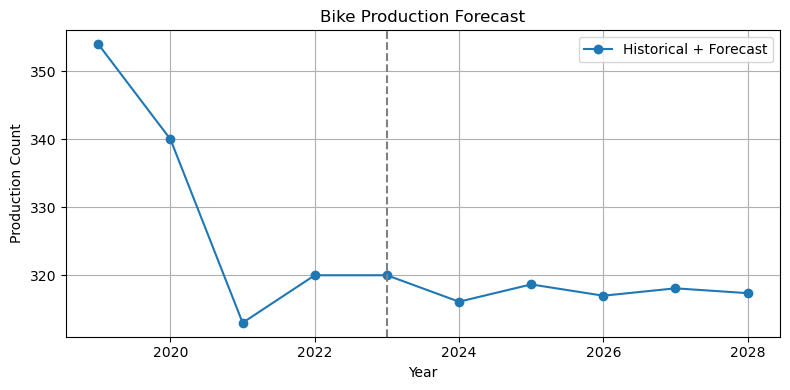

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

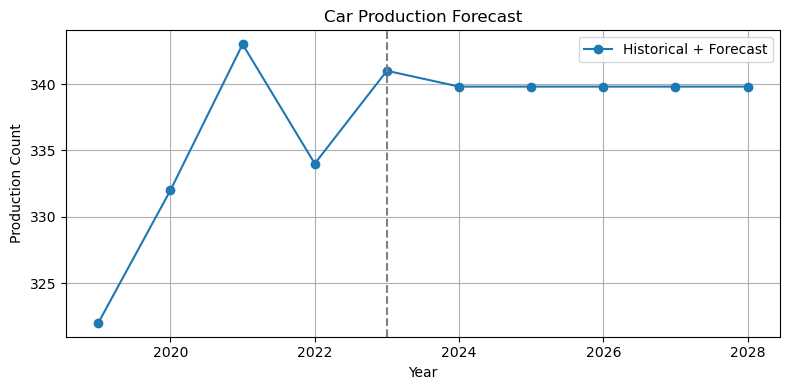

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. 

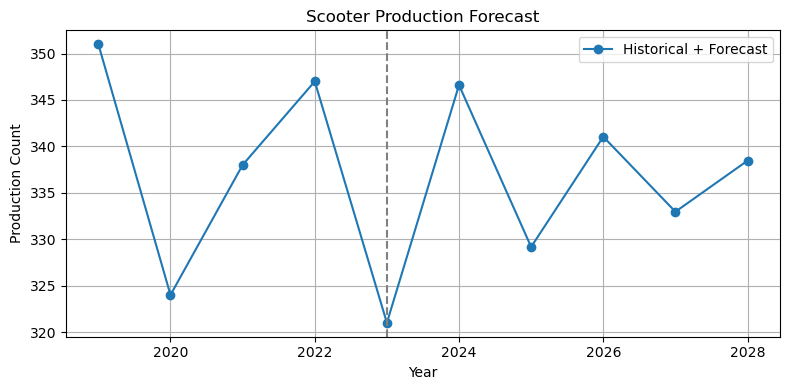

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
df = pd.read_csv("ev_vehicle_dataset.csv")

# Step 1: Group by Year and Vehicle Type
production_ts = df.groupby(['Year', 'Vehicle Type']).size().unstack(fill_value=0)

# Step 2: Forecast next 5 years for each vehicle type
forecast_steps = 5
last_year = production_ts.index.max()
future_years = [last_year + i for i in range(1, forecast_steps + 1)]

# Step 3: Plot for each vehicle type
for vehicle_type in production_ts.columns:
    series = production_ts[vehicle_type]
    
    try:
        # Fit ARIMA model
        model = ARIMA(series, order=(1, 1, 1))
        model_fit = model.fit()
        
        # Forecast future steps
        forecast = model_fit.forecast(steps=forecast_steps)
        forecast.index = future_years
        
        # Combine historical and forecast data
        combined = pd.concat([series, forecast])
        
        # Plot
        plt.figure(figsize=(8, 4))
        combined.plot(marker='o')
        plt.axvline(x=last_year, color='gray', linestyle='--', label='Forecast Start')
        plt.title(f'{vehicle_type} Production Forecast')
        plt.xlabel('Year')
        plt.ylabel('Production Count')
        plt.grid(True)
        plt.legend(['Historical + Forecast'])
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Failed to model {vehicle_type}: {e}")

CAR have more sub body types= Sedan, crossover,suv ,mpv, hatchback

In [8]:
data=pd.read_csv("indian_car_dataset.csv")

In [12]:
data.head(10)

,Make,Model,Year,Body Type
0,Honda,Amaze,2021,Sedan
1,Maruti Suzuki,Swift,2013,Hatchback
2,Hyundai,Verna,2016,Sedan
3,Tata Motors,Altroz,2010,Hatchback
4,Ford India,Figo,2022,Hatchback
5,Hyundai,Tucson,2021,SUV
6,Nissan India,Sunny,2020,Sedan
7,Mahindra,Thar,2023,SUV
8,Volkswagen India,Polo,2015,Hatchback
9,Toyota,Urban Cruiser,2021,Crossover


In [20]:
data['Body Type'].unique()

array(['Sedan', 'Hatchback', 'SUV', 'Crossover', 'MPV'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(data)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column
df['Body_Type_encoded'] = label_encoder.fit_transform(df['Body Type'])

# Print the DataFrame with encoded values
print(df)

               Make          Model  Year  Body Type  Body_Type_encoded
0             Honda          Amaze  2021      Sedan                  4
1     Maruti Suzuki          Swift  2013  Hatchback                  1
2           Hyundai          Verna  2016      Sedan                  4
3       Tata Motors         Altroz  2010  Hatchback                  1
4        Ford India           Figo  2022  Hatchback                  1
...             ...            ...   ...        ...                ...
9995         Toyota  Urban Cruiser  2011  Crossover                  0
9996       Mahindra        Marazzo  2013        MPV                  2
9997       Mahindra        Scorpio  2010  Crossover                  0
9998       Mahindra        Marazzo  2012        MPV                  2
9999         Toyota          Etios  2017      Sedan                  4

[10000 rows x 5 columns]


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               10000 non-null  object
 1   Model              10000 non-null  object
 2   Year               10000 non-null  int64 
 3   Body Type          10000 non-null  object
 4   Body_Type_encoded  10000 non-null  int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 351.7+ KB


In [32]:
df.describe()

,Year,Body_Type_encoded
count,10000.000000,10000.000000
mean,2016.566400,1.766500
std,4.017736,1.486472
min,2010.000000,0.000000
25%,2013.000000,0.000000
50%,2017.000000,2.000000
75%,2020.000000,3.000000
max,2023.000000,4.000000


In [36]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Body Type            0
Body_Type_encoded    0
dtype: int64

In [40]:
df.head(50)

,Make,Model,Year,Body Type,Body_Type_encoded
0,Honda,Amaze,2021,Sedan,4
1,Maruti Suzuki,Swift,2013,Hatchback,1
2,Hyundai,Verna,2016,Sedan,4
3,Tata Motors,Altroz,2010,Hatchback,1
4,Ford India,Figo,2022,Hatchback,1
5,Hyundai,Tucson,2021,SUV,3
6,Nissan India,Sunny,2020,Sedan,4
7,Mahindra,Thar,2023,SUV,3
8,Volkswagen India,Polo,2015,Hatchback,1
9,Toyota,Urban Cruiser,2021,Crossover,0


In [46]:
#Taking out the most selling Car body type
print(df.columns)
famous_car_type=df['Body Type'].value_counts().idxmax()
print(famous_car_type)

Index(['Make', 'Model', 'Year', 'Body Type', 'Body_Type_encoded'], dtype='object')
Crossover


In [87]:
print(df.columns)
famous_car_type=df['Make'].value_counts().idxmax()
print(famous_car_type)

Index(['Make', 'Model', 'Year', 'Body Type', 'Body_Type_encoded'], dtype='object')
Volkswagen India


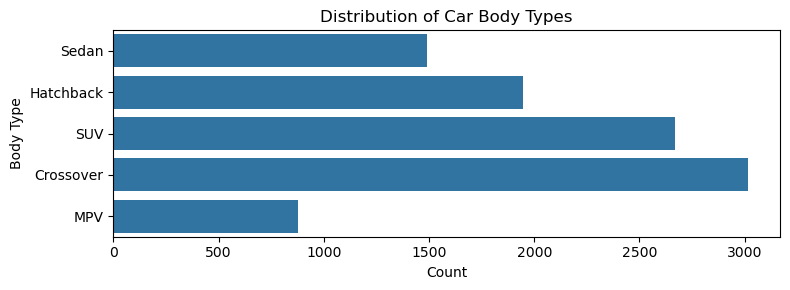

Generated a plot for CAR body type distribution


In [65]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df, y='Body Type')
plt.title('Distribution of Car Body Types')
plt.xlabel('Count')
plt.ylabel('Body Type')
plt.tight_layout()
plt.show() 
print("Generated a plot for CAR body type distribution") 

Body Type
Crossover    30.17
SUV          26.71
Hatchback    19.48
Sedan        14.88
MPV           8.76
Name: proportion, dtype: float64


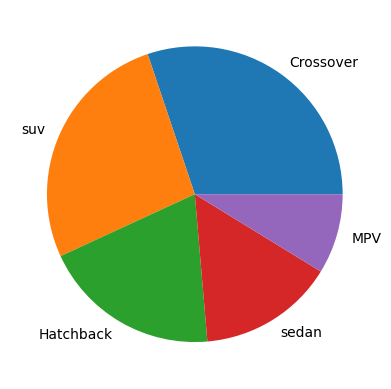

In [77]:
percent_distribution = data['Body Type'].value_counts(normalize=True) * 100
print(percent_distribution)
plt.pie(percent_distribution, labels=['Crossover','suv','Hatchback','sedan','MPV'])
plt.show()

In [81]:
production_t = data.groupby(['Year', 'Body Type']).size().unstack(fill_value=0)

# Result: a DataFrame with Year as index, and columns for each vehicle type
print(production_t)

Body Type  Crossover  Hatchback  MPV  SUV  Sedan
Year                                            
2010             201        121   62  169    120
2011             207        153   57  190    102
2012             201        131   64  194    103
2013             207        146   48  199    111
2014             212        127   57  196    116
2015             226        144   71  175    102
2016             233        152   53  188    108
2017             233        142   53  177    108
2018             210        121   85  203    106
2019             201        149   63  198     94
2020             234        146   63  176    106
2021             213        154   69  187    114
2022             200        134   74  209    103
2023             239        128   57  210     95


In [103]:

# Group by 'Model' and find min/max Year
model_years = df.groupby(['Model', 'Body Type'])['Year'].agg(['min', 'max'])

# Calculate production run length
model_years['Production Run (Years)'] = model_years['max'] - model_years['min'] + 1

# Sort by longest production run
long_running_models = model_years.sort_values(by='Production Run (Years)', ascending=False)

# Display top models
print(long_running_models.head(10))

                    min   max  Production Run (Years)
Model   Body Type                                    
Alto    Hatchback  2010  2023                      14
Altroz  Hatchback  2010  2023                      14
Nexon   SUV        2010  2023                      14
Polo    Hatchback  2010  2023                      14
Safari  Crossover  2010  2023                      14
Santro  Hatchback  2010  2023                      14
Scorpio Crossover  2010  2023                      14
Sunny   Sedan      2010  2023                      14
Swift   Hatchback  2010  2023                      14
Terrano Crossover  2010  2023                      14


In [128]:
#
df_2010_2015 = df[(df['Year'] >= 2010) & (df['Year'] <= 2015)]

In [130]:
popularity_2010_2015 = df_2010_2015['Body Type'].value_counts(normalize=True) * 100

In [132]:
popularity_2010_2015

Body Type
Crossover    29.772080
SUV          26.661918
Hatchback    19.515670
Sedan        15.527066
MPV           8.523267
Name: proportion, dtype: float64

In [172]:
df_2016_2023 = df[(df['Year'] >= 2016) & (df['Year'] <= 2023)]

In [174]:
popularity_2016_2023 = df_2016_2023['Body Type'].value_counts(normalize=True) * 100

In [176]:
popularity_2016_2023

Body Type
Crossover    30.459572
SUV          26.744990
Hatchback    19.454043
Sedan        14.409122
MPV           8.932274
Name: proportion, dtype: float64

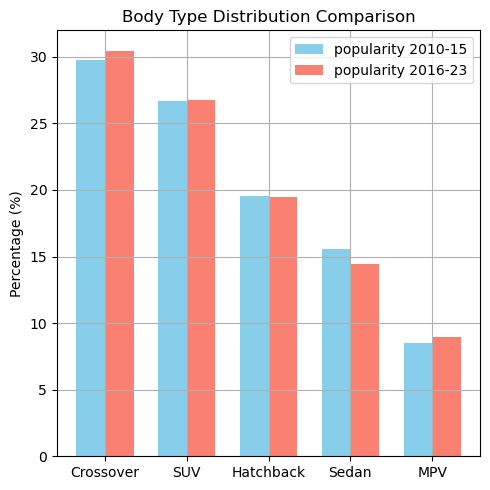

In [160]:
labels = ['Crossover', 'SUV', 'Hatchback', 'Sedan', 'MPV']
dataset_a = [29.772080       ,   26.661918,
  19.515670    ,   15.52706      ,   8.523267]
dataset_b = [30.459572,26.744990,19.454043,14.409122,8.932274]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plot
plt.figure(figsize=(5, 5))
plt.bar(x - width/2, dataset_a, width, label='popularity 2010-15', color='skyblue')
plt.bar(x + width/2, dataset_b, width, label='popularity 2016-23', color ='salmon')

plt.ylabel('Percentage (%)')
plt.title('Body Type Distribution Comparison')
plt.xticks(x, labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

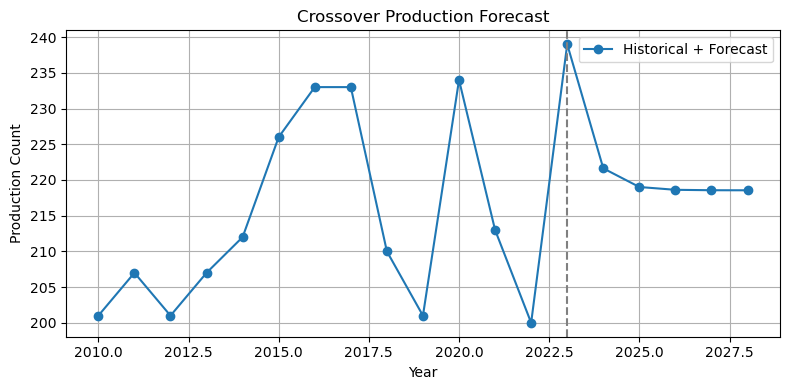

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

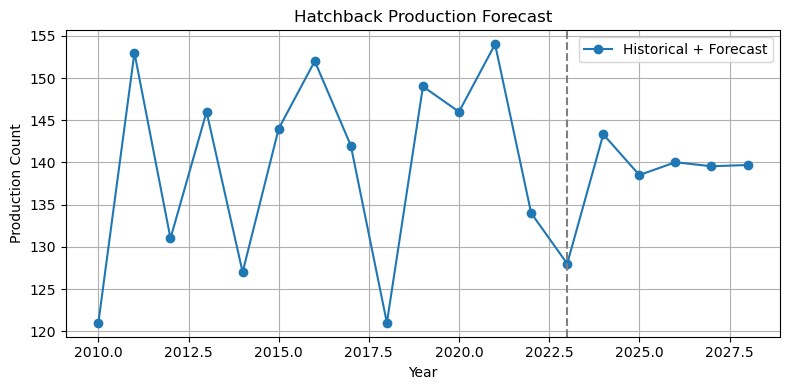

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

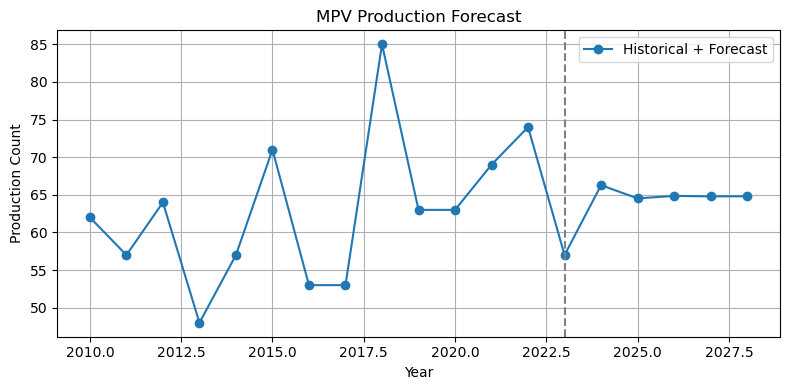

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA par

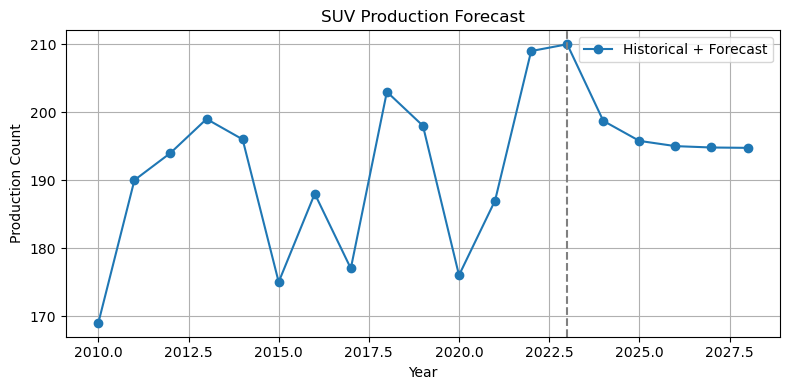

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction result

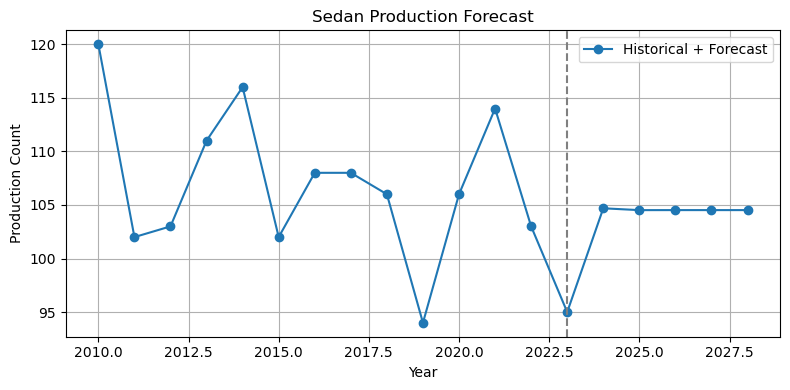

In [85]:
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
#df = pd.read_csv("ev_vehicle_dataset.csv")

# Step 1: Group by Year and Vehicle Type
production_t = df.groupby(['Year', 'Body Type']).size().unstack(fill_value=0)

# Step 2: Forecast next 5 years for each vehicle type
forecast_steps = 5
last_year = production_t.index.max()
future_years = [last_year + i for i in range(1, forecast_steps + 1)]

# Step 3: Plot for each vehicle type
for Body_type in production_t.columns:
    series = production_t[Body_type]
    
    try:
        # Fit ARIMA model
        model = ARIMA(series, order=(1, 1, 1))
        model_fit = model.fit()
        
        # Forecast future steps
        forecast = model_fit.forecast(steps=forecast_steps)
        forecast.index = future_years
        
        # Combine historical and forecast data
        combined = pd.concat([series, forecast])
        
        # Plot
        plt.figure(figsize=(8, 4))
        combined.plot(marker='o')
        plt.axvline(x=last_year, color='gray', linestyle='--', label='Forecast Start')
        plt.title(f'{Body_type} Production Forecast')
        plt.xlabel('Year')
        plt.ylabel('Production Count')
        plt.grid(True)
        plt.legend(['Historical + Forecast'])
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Failed to model {Body_type}: {e}")